In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from careful_split import careful_split
from helpers import my_train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import smogn

from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

%matplotlib inline

In [71]:
ds = pd.read_csv('da_tidy.csv', parse_dates=['date'])
ds.head()

,turma,date,student,topicos,component,relevance,learn,satisfaction,pace,tool,algorithm
0,2,2019-04-18,426,como capturar os dados (fontes de dados),Fontes de dados,5,1,6,5,False,False
1,2,2019-04-18,426,web scrapping,Fontes de dados,5,2,6,5,False,False
2,2,2019-04-18,426,fórmulas avançadas (IF. VLOOKUP. COUNTIFS. SUM...,Ferramenta,5,1,6,5,True,False
3,2,2019-04-18,426,lógica de programação,Lógica/Programação,5,1,6,5,False,False
4,2,2019-04-18,438,como capturar os dados (fontes de dados),Fontes de dados,5,4,10,10,False,False


In [150]:
numerical_features = ['satisfaction']
categorical_features = ['relevance', 'pace']
predictors = categorical_features

In [151]:
ds['lesson'] = ds.date.astype(str) + '/' + ds.turma.astype(str)

In [152]:
subset_1, subset_2 = careful_split(ds)

In [153]:
data_train, data_test = my_train_test_split(subset_1)

In [154]:
if len(categorical_features) == 0:
    features = data_train[numerical_features]
elif len(numerical_features) == 0:
    dummies = pd.get_dummies(data_train[categorical_features].astype(str), drop_first=True)
    features = dummies
else:
    dummies = pd.get_dummies(data_train[categorical_features].astype(str), drop_first=True)
    features = pd.concat([data_train[numerical_features], dummies], axis=1)

In [155]:
X_train = features.to_numpy()
y_train = data_train.learn.to_numpy()

X_test = features.to_numpy()
y_test = data_train.learn.to_numpy()

In [156]:
params = {
    'n_estimators': [50, 100]
}

regressor = GridSearchCV(RandomForestRegressor(random_state=42), params)
model = regressor.fit(X_train, y_train)

In [157]:
model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
model.fit(X_train, y_train)

[22:40:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1593723605503/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1593723605503/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [158]:
y_pred = model.predict(X_test)

In [159]:
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n-1) / (n-p-1)

In [160]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

n = len(y_test)
p = len(predictors)
print(f'R2 ajustado: {r2_adjusted(r2, n, p)}')

MSE: 0.9171991529246493
RMSE: 0.9577051492628873
MAE: 0.7601733658250294
R2: 0.2130244803097172
R2 ajustado: 0.2118248225053112


Text(0.5, 1.0, 'Feature Importance')

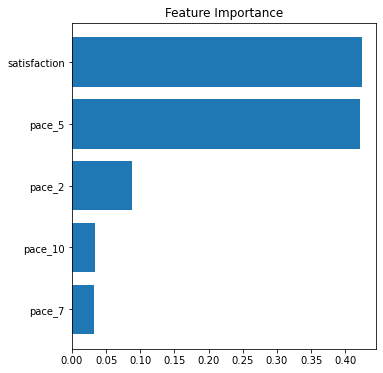

In [127]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title('Feature Importance')

In [156]:
features.head()

,satisfaction,pace_10,pace_2,pace_5,pace_7,relevance_1,relevance_2,relevance_3,relevance_4,relevance_5,relevance_6,relevance_7
803,10,0,0,1,0,0,0,0,0,1,0,0
815,10,0,0,0,1,0,0,0,0,1,0,0
788,6,0,0,1,0,0,0,0,0,1,0,0
782,10,0,0,1,0,0,0,0,0,1,0,0
830,10,0,0,1,0,0,1,0,0,0,0,0
